In [102]:
import json
import requests
from os import makedirs
from os.path import join, exists
from datetime import date, timedelta
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
import spacy
import nltk
import gensim
from matplotlib import pyplot
%matplotlib inline

In [3]:
# connect to data base
def connect_db():
    from sqlalchemy import create_engine
    dbname = 'poetry_db'
    username = 'ctoews'
    engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
    return engine


engine = connect_db()

In [4]:
query = "select * from sonnet_full;"
sonnet_full = pd.read_sql(query,engine)
sonnet_full.head()

,index,title,poem
0,0,I,"From fairest creatures we desire increase, Tha..."
1,1,II,"When forty winters shall besiege thy brow, And..."
2,2,III,Look in thy glass and tell the face thou viewe...
3,3,IV,"Unthrifty loveliness, why dost thou spend Upon..."
4,4,V,"Those hours, that with gentle work did frame T..."


In [85]:
shakespeares_stopwords = []
f = open("../data/Shakespeare/shakespeares_stopwords.txt","r")
for line in f:
    if len(line)>1:
        shakespeares_stopwords.append(line.strip('\n'))
        
stoplist = shakespeares_stopwords


In [89]:
def standardize_text(temp_df, text_field):
    temp_df[text_field] = temp_df[text_field].str.replace(r"http\S+", "")
    temp_df[text_field] = temp_df[text_field].str.replace(r"http", "")
    temp_df[text_field] = temp_df[text_field].str.replace(r"@\S+", "")
    temp_df[text_field] = temp_df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    temp_df[text_field] = temp_df[text_field].str.replace(r"@", "at")
    temp_df[text_field] = temp_df[text_field].str.lower()
    return temp_df

data = standardize_text(sonnet_full, "poem")
data = data['poem']

In [90]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokens = data.apply(tokenizer.tokenize)
tokens

0      [from, fairest, creatures, we, desire, increas...
1      [when, forty, winters, shall, besiege, thy, br...
2      [look, in, thy, glass, and, tell, the, face, t...
3      [unthrifty, loveliness, why, dost, thou, spend...
4      [those, hours, that, with, gentle, work, did, ...
5      [then, let, not, winter, s, ragged, hand, defa...
6      [lo, in, the, orient, when, the, gracious, lig...
7      [music, to, hear, why, hear, st, thou, music, ...
8      [is, it, for, fear, to, wet, a, widow, s, eye,...
9      [for, shame, deny, that, thou, bear, st, love,...
10     [as, fast, as, thou, shalt, wane, so, fast, th...
11     [when, i, do, count, the, clock, that, tells, ...
12     [o, that, you, were, your, self, but, love, yo...
13     [not, from, the, stars, do, i, my, judgement, ...
14     [when, i, consider, every, thing, that, grows,...
15     [but, wherefore, do, not, you, a, mightier, wa...
16     [who, will, believe, my, verse, in, time, to, ...
17     [shall, i, compare, thee

In [92]:
model = gensim.models.Word2Vec(tokens)

In [94]:
words = list(model.wv.vocab)
len(words)

515

In [97]:
X = model[model.wv.vocab]


/Users/ctoews/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [99]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

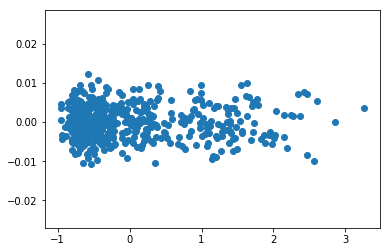

In [103]:
pyplot.scatter(result[:, 0], result[:, 1])

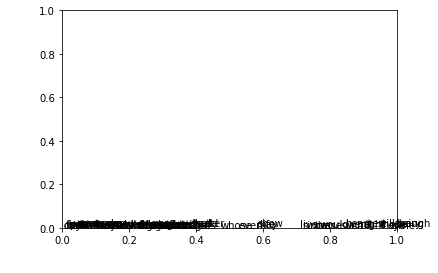

In [106]:
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()